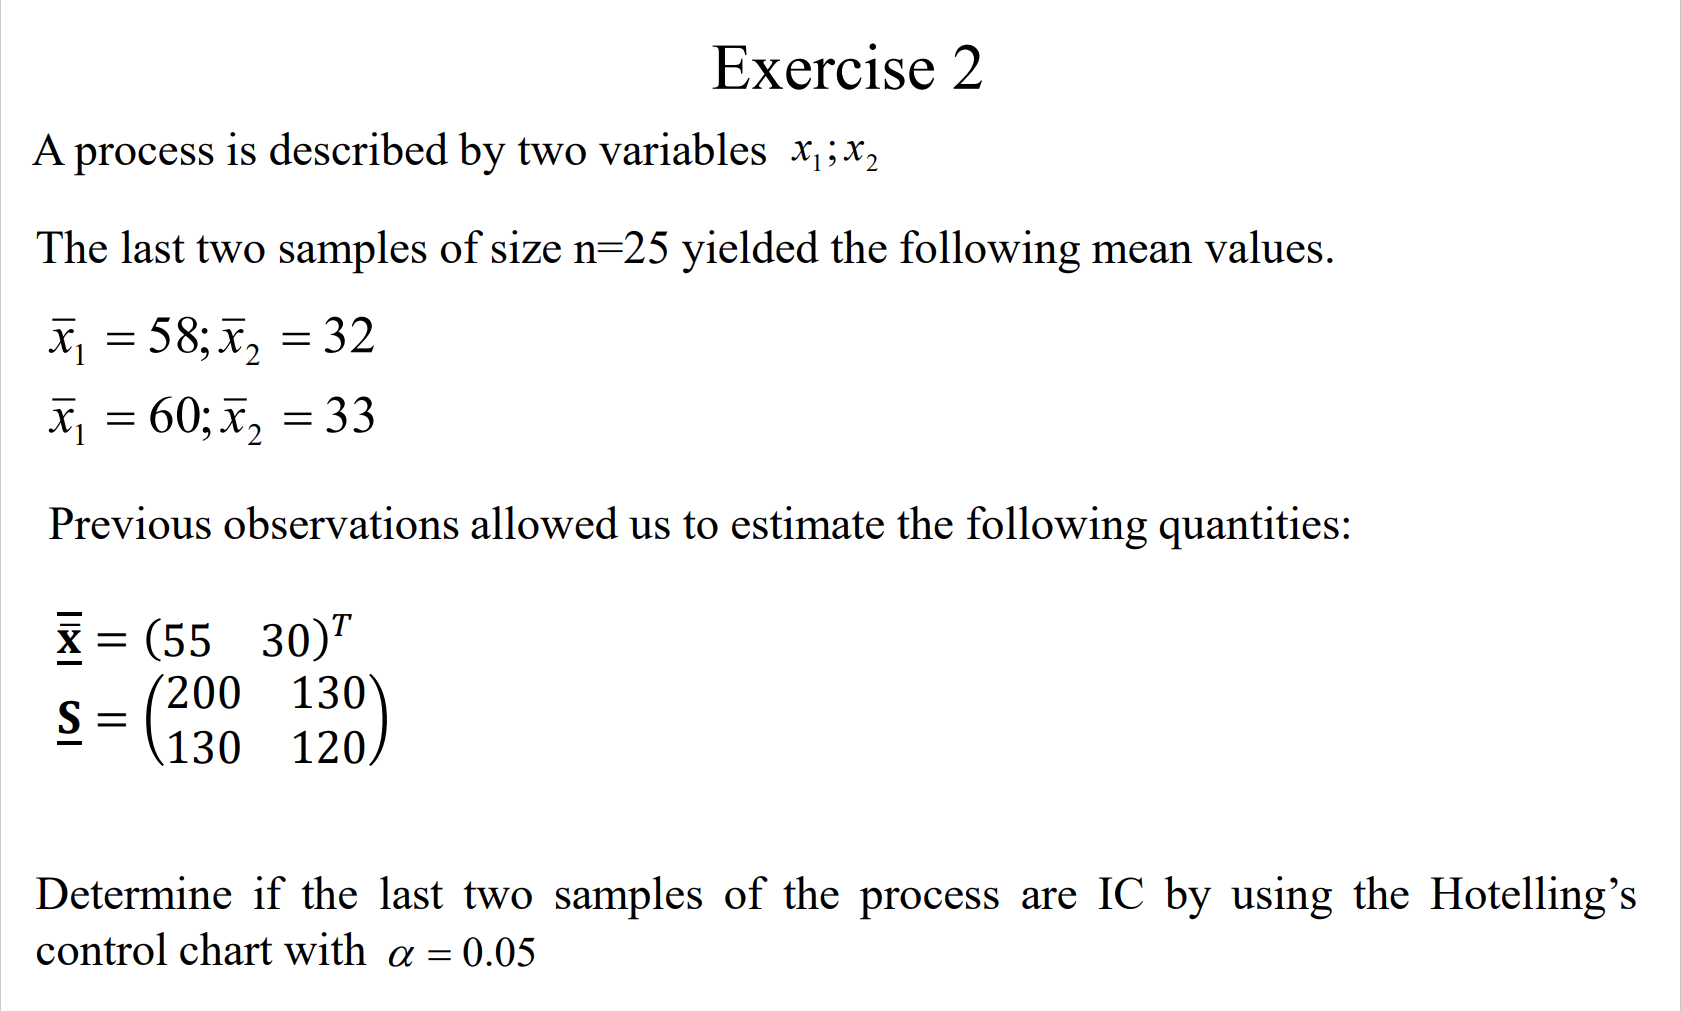

# SOLUTION

In [17]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Define the data
n = 25          # number of replicates (sample size)
p = 2           # number of random variables
alpha = 0.05    # significance level

data = pd.DataFrame({'xbar1': [58, 60], 'xbar2': [32, 33]}, index=['sample1', 'sample2'])
data.head()

,xbar1,xbar2
sample1,58,32
sample2,60,33


In [32]:
# define the sample mean vector as a pandas series
Xbarbar = pd.Series({'xbar1': 55, 'xbar2': 30})
# define the covariance matrix as a pandas dataframe
S = pd.DataFrame([[200, 130],
                [130, 120]],
                columns=['xbar1', 'xbar2'],
                index=['xbar1', 'xbar2'])

> Now let's calculate the Hotelling T<sup>2</sup> statistics for the 1st and 2nd sample

In [35]:
S_inv = np.linalg.inv(S) # inverse of the covariance matrix

# Calculate the Hotelling's T2 statistic of the sample 1
T2_1 = n * (data.loc['sample1'] - Xbarbar).transpose().dot(S_inv).dot(data.loc['sample1'] - Xbarbar)

# Calculate the Hotelling's T2 statistic of the sample 2
T2_2 = n * (data.loc['sample2'] - Xbarbar).transpose().dot(S_inv).dot(data.loc['sample2'] - Xbarbar)

print("T2_1 = %.3f" % T2_1)
print("T2_2 = %.3f" % T2_2)

T2_1 = 1.127
T2_2 = 3.169


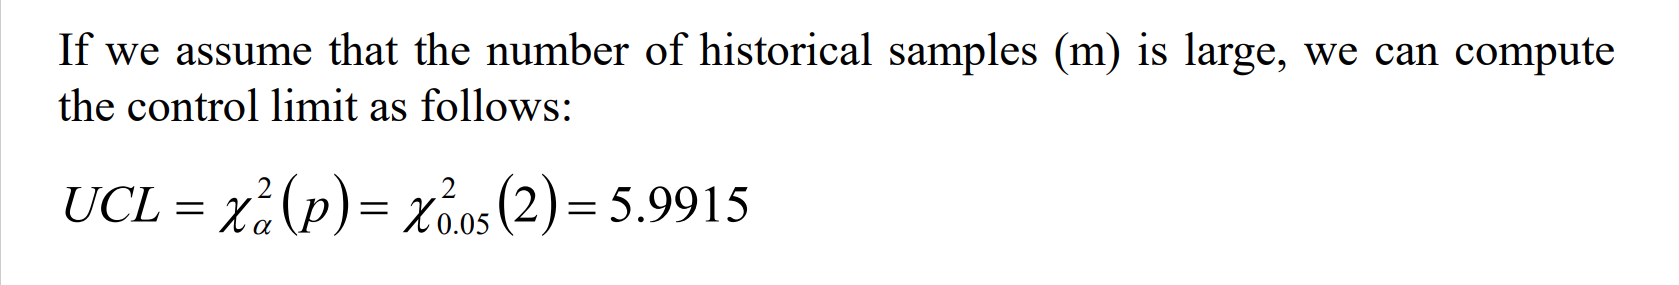

In [ ]:
# Calculate the UCL of the Hotelling's T2 statistic
UCL = stats.chi2.ppf(1-alpha, p)

print("UCL = %.4f" % UCL)

UCL = 5.9915


> Therefore both the samples are IC

> Assuming now that we know the number of samples ($m=20$), we could design the $T^2$ control chart by 
using the $F$ distribution (control limits for future observations). In this case UCL will be:
> 
> $$ UCL = c_2 (m,n,p) F_\alpha (p, m(n-1) - (p-1)) $$
> where $c_2$ is a constant that depends on $m$, $n$ and $p$:
> $$ c_2 (m,n,p) = \frac{p(n-1)(m+1)}{m(n-1)-(p-1)}$$

In [16]:
m = 20          # number of samples

c2 = (p*(n-1)*(m+1))/(m*(n-1)-(p-1))

UCL_new = c2*stats.f.ppf(1-alpha, p, (m*(n-1)-(p-1)))

print("New UCL = %.4f" % UCL_new)

New UCL = 6.3438


> Therefore both the samples are IC also in this case